In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../Optimus")

In [3]:
# import os
# os.path.getsize('C:\\Python27\\Lib\\genericpath.py')

In [4]:
from optimus import Optimus

In [5]:
# op = Optimus("dask", threads_per_worker=8, n_workers=1)
op = Optimus("pandas")

C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [6]:
# op = Optimus("dask")
op.client

<module 'pandas' from 'C:\\Users\\argenisleon\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [318]:
import random
[random.randint(0,10) for i in range(5)]

[2, 4, 4, 7, 8]

In [359]:
import numpy as np
size = 1000
data = {
    "length":[round(random.uniform(1,2),1) for i in range(size)], 
    "width": [round(random.uniform(1,1.5),1) for i in range(size)], 
    "height": [random.randint(20,50) for i in range(size)],
    "type": [random.randint(0,1) for i in range(size)]
}

df = op.create.dataframe(data).repartition(4).execute()
df["weight"] = df["height"]*df["width"]*df["length"]*[random.uniform(1,1) for i in range(size)]
df = df.cols.round("weight",1)

In [360]:
df = df.cols.set("type",value=1, where=df["weight"]<40, default=0)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: weight_, Length: 1000, dtype: bool


In [361]:
df.display(100)

length 1 (float64) not nullable,width 2 (float64) not nullable,height 3 (int64) not nullable,type 4 (int64) not nullable,weight 5 (float64) not nullable
1.2,1.4,44,1,73.9
1.7,1.2,27,0,55.1
1.3,1.3,42,0,71.0
1.1,1.0,42,1,46.2
1.3,1.1,28,1,40.0
1.8,1.3,31,0,72.5
1.4,1.0,37,1,51.8
1.1,1.1,27,1,32.7
1.6,1.2,26,0,49.9
1.3,1.3,49,1,82.8


#### Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html
https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

In [284]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [285]:
lm = df.ml.linear_regression("height","weight", test_size=0.2,fit_intercept=False)

{'accuracy': 0.531911121768067, 'standard deviation': 0.04402802475431933}
{'neg_mean_absolute_error': [-11.814279527493392, -11.963604105472688, -12.353596095706903, -12.840267120142936, -12.455151802763655], 'neg_mean_squared_error': [-211.388722003471, -217.26065685705225, -233.1028108414047, -253.3947803078182, -232.71466529147492], 'neg_root_mean_squared_error': [-14.539213252561881, -14.739764477665586, -15.267704832141755, -15.918378695954503, -15.254988210138837], 'r2': [0.5892491455828375, 0.456052901093813, 0.5223437015017275, 0.5368933755104304, 0.5550164851515267]}


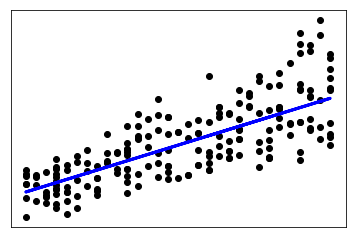

In [286]:
print(lm.evaluate())
print(lm.scores())
lm.plot()

In [287]:
lm.predict(30)

[55.723340037416875]

Interpreting https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

In [288]:
lm.evaluate()

{'accuracy': 0.531911121768067, 'standard deviation': 0.04402802475431933}

In [289]:
lm.scores()

{'neg_mean_absolute_error': [-11.814279527493392,
  -11.963604105472688,
  -12.353596095706903,
  -12.840267120142936,
  -12.455151802763655],
 'neg_mean_squared_error': [-211.388722003471,
  -217.26065685705225,
  -233.1028108414047,
  -253.3947803078182,
  -232.71466529147492],
 'neg_root_mean_squared_error': [-14.539213252561881,
  -14.739764477665586,
  -15.267704832141755,
  -15.918378695954503,
  -15.254988210138837],
 'r2': [0.5892491455828375,
  0.456052901093813,
  0.5223437015017275,
  0.5368933755104304,
  0.5550164851515267]}

In [290]:
lm.intercept()

0.0

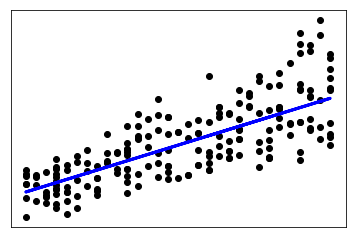

In [291]:
lm.plot()

## MLR Multiple Linear Regresion

In [292]:
df

length 1 (float64) not nullable,width 2 (float64) not nullable,height 3 (int64) not nullable,type 4 (int64) not nullable,weight 5 (float64) not nullable
1.9,1.1,27,0,56.4
1.2,1.1,36,1,47.5
1.9,1.2,40,0,91.2
1.9,1.2,41,1,93.5
2.0,1.4,28,1,78.4
1.8,1.1,30,1,59.4
1.7,1.0,40,1,68.0
1.6,1.1,38,1,66.9
1.2,1.4,47,1,79.0


In [312]:
lm = df.ml.linear_regression(["length","width","height"],"weight", test_size=0.2,fit_intercept=False,)
print(lm.predict([[1.4,1.38,25]]))
print(lm.coef())
print(lm.intercept())
print(lm.evaluate())
print(lm.scores())


lm.score(x,Y) 0.6887234520990722
[49.26037611471356]
[23.88169751409979, -12.836504676536569, 1.3416150419437727]
0.0
{'accuracy': 0.6837674497276343, 'standard deviation': 0.00977973791843687}
{'neg_mean_absolute_error': [-10.542734198504714, -9.31762469178452, -9.772300900058315, -10.638838707557564, -10.789664759783088], 'neg_mean_squared_error': [-158.4184892208576, -127.3405160626152, -147.5278131069444, -177.11217567261568, -171.81083802100656], 'neg_root_mean_squared_error': [-12.58644068912485, -11.284525513401757, -12.14610279500978, -13.308349847844235, -13.10766333184548], 'r2': [0.6921759629074495, 0.6811824778240891, 0.6976973856306187, 0.6763081633642554, 0.6714732589117582]}


TypeError: score() missing 2 required positional arguments: 'X' and 'y'

Can not be plot bease of multiple dimmensions

In [294]:
df

length 1 (float64) not nullable,width 2 (float64) not nullable,height 3 (int64) not nullable,type 4 (int64) not nullable,weight 5 (float64) not nullable
1.9,1.1,27,0,56.4
1.2,1.1,36,1,47.5
1.9,1.2,40,0,91.2
1.9,1.2,41,1,93.5
2.0,1.4,28,1,78.4
1.8,1.1,30,1,59.4
1.7,1.0,40,1,68.0
1.6,1.1,38,1,66.9
1.2,1.4,47,1,79.0


## Logistic regression 

https://www.kaggle.com/ankitagarwal/logistic-regression-with-k-fold
https://medium.com/@lily_su/logistic-regression-accuracy-cross-validation-58d9eb58d6e6
https://medium.com/@oluwabukunmige/logistic-regression-in-scikit-learn-a-step-by-step-process-32f546241f32

In [315]:
df

length 1 (float64) not nullable,width 2 (float64) not nullable,height 3 (int64) not nullable,type 4 (int64) not nullable,weight 5 (float64) not nullable
1.9,1.1,27,0,56.4
1.2,1.1,36,1,47.5
1.9,1.2,40,0,91.2
1.9,1.2,41,1,93.5
2.0,1.4,28,1,78.4
1.8,1.1,30,1,59.4
1.7,1.0,40,1,68.0
1.6,1.1,38,1,66.9
1.2,1.4,47,1,79.0


In [532]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [534]:
df = op.create.dataframe(df)

In [536]:
df

sepal length (cm) 1 (float64) not nullable,sepal width (cm) 2 (float64) not nullable,petal length (cm) 3 (float64) not nullable,petal width (cm) 4 (float64) not nullable,target 5 (float64) not nullable
5.1,3.5,1.4,0.2,0.0
4.9,3.0,1.4,0.2,0.0
4.7,3.2,1.3,0.2,0.0
4.6,3.1,1.5,0.2,0.0
5.0,3.6,1.4,0.2,0.0
5.4,3.9,1.7,0.4,0.0
4.6,3.4,1.4,0.3,0.0
5.0,3.4,1.5,0.2,0.0
4.4,2.9,1.4,0.2,0.0


In [578]:
lr = df.ml.logistic_regression([0,1,2,3],"target", test_size=0.2)

predictions [2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 2. 0. 0.
 2. 0. 0. 1. 1. 0.]
cm = metrics.confusion_matrix(y_test, predictions) [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [573]:
lr.evaluate()

{'accuracy': 0.94, 'standard deviation': 0.9}

In [413]:
# for i in range(100):
#     print(i, lr.predict(i))

In [299]:
lr.evaluate()

{'accuracy': -0.8685418905204768, 'standard deviation': 0.08533609594543551}

In [558]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
# print(y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
# clf.score(X, y)

C:\Users\argenisleon\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[9.81807257e-01, 1.81927283e-02, 1.43681875e-08],
       [9.71738201e-01, 2.82617692e-02, 3.00548363e-08]])

Random Forest

https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

In [365]:
rf = df.ml.random_forest("height","weight", test_size=0.2,fit_intercept=False,)
rf.score()
# df.ml.random_forest(["reclat","reclong"],"mass (g)", test_size=0.2, n_estimators=100)

TypeError: 'NoneType' object is not callable

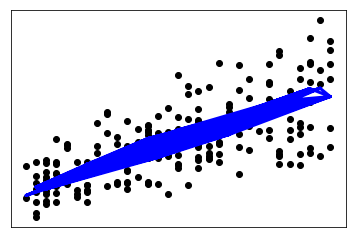

In [91]:
rf.plot()

In [ ]:
rf = df.ml.random_forest(["length","width","height"],"weight", test_size=0.2,fit_intercept=False,)
rf.score()
# df.ml.random_forest(["reclat","reclong"],"mass (g)", test_size=0.2, n_estimators=100)

In [83]:
rf.eval()

{'mean_absolute_error': 1.9681966786884082,
 'mean_squared_error': 6.834247717452712,
 'root_mean_squared_error': 2.6142394147156285,
 'r_square': 0.9848325157200486}

In [364]:
rf.plot()

NameError: name 'rf' is not defined

## K Folds

In [18]:
from sklearn.model_selection import train_test_split

X = df.data.iloc[:, 0:4].values
y = df.data.iloc[:, 4].values

# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


ValueError: could not convert string to float: 'Esnandes'

In [10]:
## REferencia https://rubialesalberto.medium.com/regresi%C3%B3n-lineal-con-sklearn-bc61cf94c1e

In [42]:
op.client

Client Scheduler: inproc://192.168.100.4/25628/1 Dashboard: http://192.168.100.4:8787/status,Cluster Workers: 1 Cores: 8 Memory: 4.00 GB


In [21]:
df

name 1 (object) not nullable,id 2 (int64) not nullable,nametype 3 (object) not nullable,recclass 4 (object) not nullable,mass (g) 5 (object) not nullable,fall 6 (object) not nullable,year 7 (object) not nullable,reclat 8 (object) not nullable,reclong 9 (object) not nullable,GeoLocation 10 (object) not nullable
Aachen,1,Valid,L5,21,Fell,01/01/1880⋅12:00:00⋅AM,50.775000,6.083330,"(50.775000,⋅6.083330)"
Aarhus,2,Valid,H6,720,Fell,01/01/1951⋅12:00:00⋅AM,56.183330,10.233330,"(56.183330,⋅10.233330)"
Abee,6,Valid,EH4,107000,Fell,01/01/1952⋅12:00:00⋅AM,54.216670,-113.000000,"(54.216670,⋅-113.000000)"
Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976⋅12:00:00⋅AM,16.883330,-99.900000,"(16.883330,⋅-99.900000)"
Achiras,370,Valid,L6,780,Fell,01/01/1902⋅12:00:00⋅AM,-33.166670,-64.950000,"(-33.166670,⋅-64.950000)"
Adhi⋅Kot,379,Valid,EH4,4239,Fell,01/01/1919⋅12:00:00⋅AM,32.100000,71.800000,"(32.100000,⋅71.800000)"
Adzhi-Bogdo⋅(stone),390,Valid,LL3-6,910,Fell,01/01/1949⋅12:00:00⋅AM,44.833330,95.166670,"(44.833330,⋅95.166670)"
Agen,392,Valid,H5,30000,Fell,01/01/1814⋅12:00:00⋅AM,44.216670,0.616670,"(44.216670,⋅0.616670)"
Aguada,398,Valid,L6,1620,Fell,01/01/1930⋅12:00:00⋅AM,-31.600000,-65.233330,"(-31.600000,⋅-65.233330)"
Aguila⋅Blanca,417,Valid,L,1440,Fell,01/01/1920⋅12:00:00⋅AM,-30.866670,-64.550000,"(-30.866670,⋅-64.550000)"


In [ ]:
df.ml.random_forest([""])

In [40]:
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier

import sklearn.datasets

X, y = sklearn.datasets.make_classification()

da_rf = RandomForestClassifier()
with joblib.parallel_backend("dask"):
    da_rf.fit(X, y)
    

In [47]:
print(X)
# da_rf.predict([[1]])

100


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
df.ml.random_forest(["reclong","reclat"],["mass (g)"])

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:3370: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('reclong', 'float64'))

  warnings.warn(meta_warning(meta))
C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:3370: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('reclat', 'float64')

ValueError: Unknown label type: 'continuous'

In [30]:
import dask

'2021.03.0'

In [20]:
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()
X = iris.data
y = iris.target
# print(X)
est = KMeans(n_clusters=8)
est.fit(X)
labels = est.labels_
print(labels)


[4 0 0 0 4 4 0 4 0 0 4 0 0 0 4 4 4 4 4 4 4 4 0 4 0 0 4 4 4 0 0 4 4 4 0 0 4
 4 0 4 4 0 0 4 4 0 4 0 4 0 6 6 6 2 6 2 6 5 6 2 5 2 2 6 2 6 2 2 6 2 3 2 3 6
 6 6 6 6 6 2 2 2 2 3 2 6 6 6 2 2 2 6 2 5 2 2 2 6 5 2 7 3 1 7 7 1 2 1 7 1 7
 3 7 3 3 7 7 1 1 3 7 3 1 3 7 1 3 3 7 1 1 1 7 3 3 1 7 7 3 7 7 7 3 7 7 7 3 7
 7 3]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [58]:
df.ml.KMeans("")

reclat 1 (object) not nullable
50.775000
56.183330
54.216670
16.883330
-33.166670
32.100000
44.833330
44.216670
-31.600000
-30.866670


In [63]:
%%time
l = df.ml.linear_regression(["reclong","reclat"],["mass (g)"], fit_intercept=False)

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:3370: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('reclong', 'float64'))

  warnings.warn(meta_warning(meta))
C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:3370: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('reclat', 'float64')

tmp     reclong       reclat     mass (g)
  (float64)    (float64)    (float64)
-----------  -----------  -----------
    6.08333      50.775            21
   10.2333       56.1833          720
 -113            54.2167       107000
  -99.9          16.8833         1914
  -64.95        -33.1667          780
   71.8          32.1            4239
   95.1667       44.8333          910
    0.61667      44.2167        30000
  -65.2333      -31.6            1620
  -64.55        -30.8667         1440
Wall time: 35.8 s


In [64]:
l.predict([[1.1,2.2],[3.2,4.2]])

array([282.7777281 , 573.91965399])

In [68]:
%%time
m = df.ml.logistic_regression(["reclong","reclat"],["mass (g)"],random_state=0)

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:3370: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('reclong', 'float64'))

  warnings.warn(meta_warning(meta))
C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:3370: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('reclat', 'float64')

Wall time: 43 s


C:\Users\argenisleon\Anaconda3\lib\site-packages\dask_glm\utils.py:52: RuntimeWarning: overflow encountered in exp
  return np.exp(A)


In [69]:
m.predict([[1.1,2.2],[3.2,4.2]])

NotImplementedError: Could not find signature for add_intercept: <list>

In [23]:
# from sklearn.linear_model import LinearRegression
from dask_ml.linear_model import LogisticRegression
#Instanciamos el modelo

lm = LinearRegression(fit_intercept=False)

X_train = df.cols.select(["reclat"]).cols.to_integer().data

y_train = df["mass (g)"].cols.to_integer().get_series()


In [25]:
#Entrenamos
print(X_train)
print(y_train)
lm.fit(X_train.values, y_train.values)

# X_train.values
# #Predecimos en train y test
# predictions_train = lm.predict([[1,2],[2,3]])
# print(predictions_train)
# predictions_test = lm.predict(X_test)
# #Realizamos métricas para comprobar lo buenos que es nuestro modelo
# mean_absolute_error(predictions_train, y_train)
# np.sqrt(mean_squared_error(predictions_train, y_train))
# mean_absolute_error(predictions_test, y_test)
# np.sqrt(mean_squared_error(predictions_test, y_test))
# r2_score(predictions_train, y_train)
# r2_score(predictions_test, y_test)
# np.min(df_ad['Sales'])
# np.max(df_ad['Sales'])

Dask DataFrame Structure:
              reclat
npartitions=4       
               int64
                 ...
                 ...
                 ...
                 ...
Dask Name: getitem, 24 tasks
Dask Series Structure:
npartitions=4
    int64
      ...
      ...
      ...
      ...
Name: mass (g), dtype: int64
Dask Name: getitem, 28 tasks


LinearRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                 intercept_scaling=1.0, max_iter=100, multi_class='ovr',
                 n_jobs=1, penalty='l2', random_state=None, solver='admm',
                 solver_kwargs=None, tol=0.0001, verbose=0, warm_start=False)

In [27]:
lm.predict([[1],[3]])

array([ 65.63089167, 196.89267501])

In [42]:
y_train

Dask Series Structure:
npartitions=4
    int64
      ...
      ...
      ...
      ...
Name: mass (g), dtype: int64
Dask Name: getitem, 28 tasks

In [23]:
import urllib
req = urllib.request.Request('https://raw.githubusercontent.com/ironmussa/Optimus/develop-3.0/examples/data/crime.csv', 
                                 method='HEAD')
f = urllib.request.urlopen(req)
f.status

f.headers['Content-Length']

'57643879'

In [5]:
import fsspec

In [47]:
file_name = "data/crime.csv"
openfile  = fsspec.open(file_name)

In [53]:
import pandas as pd
with openfile as f:
    df = pd.read_csv(f, encoding="latin-1")

In [54]:
fs = fsspec.filesystem(...)
with fs.open(path, mode='rb', cache_type='readahead') as f:
    use_for_something(f)

ValueError: Protocol not known: Ellipsis

In [55]:
fsspec.spec.read_block(file_name, 0, 13)  

AttributeError: 'str' object has no attribute 'seek'

In [ ]:
file_name = "data/store-demo.csv"


import os
memory_usage = os.path.getsize(file_name)*150

import psutil
mem = psutil.virtual_memory()
chunksize = mem.free*0.75
df = pd.read_csv(file_name, encoding="latin-1" , chunksize=10).get_chunk()



In [ ]:
df

In [107]:
disk_usage

21789639875

In [93]:
# import psutil
# mem = psutil.virtual_memory()
# mem.free

In [104]:
total_memory = 200000000

In [105]:
total_memory >df.memory_usage().sum()

False

In [95]:
df.count()

id                  4018121
transaction_date    4018121
name                4018121
code                4018121
price               4018121
discount            4018121
color               4018121
dtype: int64

In [89]:
df

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; BuÅ£iu, Ioan...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44215,d4f00f66c732c292fcfc28b19f44daa2fa620901,PMC,Epidemiology and clinical profile of pathogens...,10.1371/journal.pone.0188325,PMC5693464,29149199.0,cc-by,This study aimed to identify a broad spectrum ...,2017 Nov 17,"Brini, Ines; Guerrero, Aida; Hannachi, Naila; ...",PLoS One,NaN,NaN,True,comm_use_subset
44216,ec575d33c0d3b34af7644fcfed64af045a75ab63,Elsevier,Functional Analysis of the Transmembrane Domai...,10.1016/j.jmb.2008.12.029,PMC2750892,19121325.0,els-covid,"Abstract To enter cells, enveloped viruses use...",2009-02-13,"Bissonnette, Mei Lin Z.; Donald, Jason E.; DeG...",Journal of Molecular Biology,NaN,NaN,True,custom_license
44217,7f8715a818bfd325bf4413d3c07003d7ce7b6f7e,PMC,Viral Entry Properties Required for Fitness in...,10.1128/mBio.00898-18,PMC6030562,29970463.0,cc-by,Human parainfluenza viruses cause a large burd...,2018 Jul 3,"Iketani, Sho; Shean, Ryan C.; Ferren, Marion; ...",mBio,NaN,NaN,True,comm_use_subset
44218,07e78e218a159c35e9599e3751a99551a271597b,Elsevier,Arenavirus reverse genetics: New approaches fo...,10.1016/j.virol.2011.01.013,PMC3057228,21324503.0,els-covid,"Abstract Several arenaviruses, chiefly Lassa v...",2011-03-15,"Emonet, Sebastien E.; Urata, Shuzo; de la Torr...",Virology,NaN,NaN,True,custom_license


In [27]:
## https://machinelearningmastery.com/calculate-feature-importance-with-python/
# check scikit-learn version
import sklearn
print(sklearn.__version__)
1
2
3
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.1
0.22.1


Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000


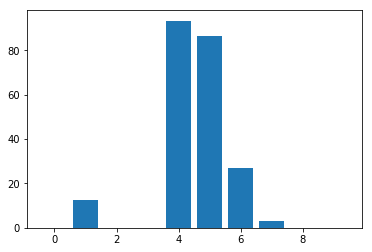

In [35]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [34]:
X

array([[-2.02220122,  0.31563495,  0.82797464, ..., -0.50446586,
         0.23009474,  0.76201118],
       [ 0.71256194,  1.74103872, -1.21466535, ...,  1.04131149,
        -0.75850596,  0.74791592],
       [ 0.08338884,  0.92829021,  1.45167891, ...,  1.22393601,
         0.3416886 , -0.12517266],
       ...,
       [ 0.12182436,  0.74220833, -0.64488697, ..., -2.37934499,
         1.82039313, -1.55531804],
       [ 0.00820639, -0.89191578,  0.14747174, ..., -1.78611048,
         0.71238157, -1.07498942],
       [-0.43805451,  0.29078795,  0.17794556, ..., -0.18581086,
        -0.26120192,  0.8632634 ]])

In [33]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


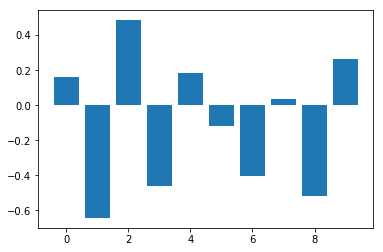

In [37]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00282
Feature: 1, Score: 0.00431
Feature: 2, Score: 0.00271
Feature: 3, Score: 0.00123
Feature: 4, Score: 0.51649
Feature: 5, Score: 0.43812
Feature: 6, Score: 0.02756
Feature: 7, Score: 0.00286
Feature: 8, Score: 0.00259
Feature: 9, Score: 0.00132


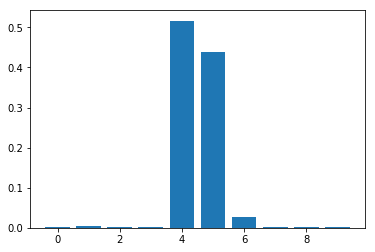

In [38]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00240
Feature: 1, Score: 0.00441
Feature: 2, Score: 0.00220
Feature: 3, Score: 0.00199
Feature: 4, Score: 0.51712
Feature: 5, Score: 0.43842
Feature: 6, Score: 0.02677
Feature: 7, Score: 0.00273
Feature: 8, Score: 0.00260
Feature: 9, Score: 0.00138


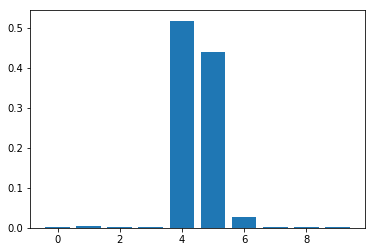

In [39]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01345
Feature: 1, Score: 0.01500
Feature: 2, Score: 0.18847
Feature: 3, Score: 0.30769
Feature: 4, Score: 0.09663
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.16476
Feature: 7, Score: 0.03441
Feature: 8, Score: 0.12874
Feature: 9, Score: 0.05084


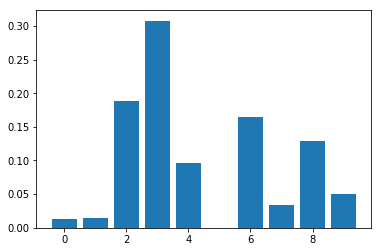

In [40]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00298
Feature: 1, Score: 0.00555
Feature: 2, Score: 0.00280
Feature: 3, Score: 0.00295
Feature: 4, Score: 0.52994
Feature: 5, Score: 0.42103
Feature: 6, Score: 0.02586
Feature: 7, Score: 0.00306
Feature: 8, Score: 0.00321
Feature: 9, Score: 0.00263


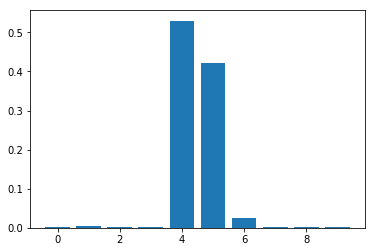

In [41]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.06413
Feature: 1, Score: 0.11648
Feature: 2, Score: 0.16180
Feature: 3, Score: 0.17714
Feature: 4, Score: 0.08198
Feature: 5, Score: 0.11332
Feature: 6, Score: 0.10032
Feature: 7, Score: 0.05333
Feature: 8, Score: 0.08754
Feature: 9, Score: 0.04396


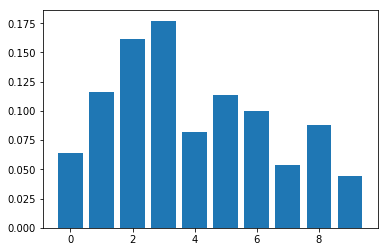

In [42]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

[21:09:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00060
Feature: 1, Score: 0.01917
Feature: 2, Score: 0.00091
Feature: 3, Score: 0.00118
Feature: 4, Score: 0.49380
Feature: 5, Score: 0.42342
Feature: 6, Score: 0.05057
Feature: 7, Score: 0.00419
Feature: 8, Score: 0.00124
Feature: 9, Score: 0.00491


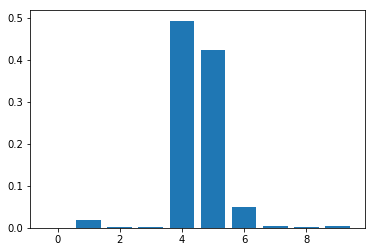

In [43]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [46]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)


In [51]:
X

array([[ 2.56999479, -0.13019997,  3.16075093, ..., -1.93094078,
         3.26130366,  2.05692145],
       [ 0.34129317,  2.51321418, -0.80416572, ...,  6.24734437,
        -1.92769365,  2.9503149 ],
       [ 2.27539972,  3.36561455,  0.17164362, ...,  2.74693781,
         0.13492444,  2.00339547],
       ...,
       [ 0.5234359 ,  1.90466429,  0.93243365, ...,  1.53945231,
         1.90646166,  1.99458587],
       [ 1.33747921,  3.25859684,  0.78792366, ...,  5.18788314,
        -0.82071083,  3.51411431],
       [-0.98534299,  0.83919047,  2.5820803 , ...,  3.04705685,
         0.66885641,  3.32838496]])

In [ ]:
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()